<a href="https://colab.research.google.com/github/kisung2577/CMPE-258/blob/main/3c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import torch
import torch.nn as nn

from typing import Callable

In [ ]:
# Generate non-linear data
n = 400
dim = 3
x = torch.rand(n, dim).float()
print('Input tensor shape =', x.shape)

Input tensor shape = torch.Size([400, 3])


In [ ]:
# Initialize weights and bias
weights = torch.tensor([[3.0, -3.0, 6.0]]).T
bias = torch.tensor([[8]])
print('Weights shape =', weights.shape)
print('Bias shape =', bias.shape)

# non-linear 3 variable function we want to learn
y_true = (torch.einsum('ij, jk -> ik', (x**3),  weights) + torch.einsum('ij, jk -> ik', (x**2),  weights) + torch.einsum('ij, jk -> ik', x, weights) + bias).float()
print('Function output shape =', y_true.shape)

Weights shape = torch.Size([3, 1])
Bias shape = torch.Size([1, 1])
Function output shape = torch.Size([400, 1])


In [ ]:
input_dim = dim
output_dim = 1
hidden_dim = 32

learning_rate = 0.01
num_epochs = 100

In [ ]:
# Non-linear model

class Model(nn.Module):
  def __init__(self, input_dim, output_dim, hidden_dim):
    super().__init__()
    self.linear1 = nn.Linear(input_dim, hidden_dim)
    self.relu1 = nn.ReLU()
    self.linear2 = nn.Linear(hidden_dim, hidden_dim)
    self.relu2 = nn.ReLU()
    self.linear3 = nn.Linear(hidden_dim, output_dim)

  def forward(self, x):
    l1 = self.linear1(x)
    r1 = self.relu1(l1)
    l2 = self.linear2(r1)
    r2 = self.relu2(l2)
    l3 = self.linear3(r2)
    return l3

In [ ]:
def torch_fit(x, y_true, model, loss, optimizer, lr, num_epochs):
  for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred_tensor = model(x)
    loss_value = loss(y_pred_tensor, y_true)
    print(f'Epoch {epoch}, loss {loss_value}')
    loss_value.backward()
    optimizer.step()

In [ ]:
loss = nn.MSELoss()
model = Model(input_dim, output_dim, hidden_dim)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
# Train model

torch_fit(x, y_true, model, loss, optimizer, learning_rate, num_epochs)

Epoch 0, loss 253.37420654296875
Epoch 1, loss 237.9323272705078
Epoch 2, loss 221.11695861816406
Epoch 3, loss 195.41969299316406
Epoch 4, loss 148.65121459960938
Epoch 5, loss 68.94464111328125
Epoch 6, loss 26.485437393188477
Epoch 7, loss 25.682844161987305
Epoch 8, loss 23.639917373657227
Epoch 9, loss 24.757856369018555
Epoch 10, loss 22.34221649169922
Epoch 11, loss 27.138280868530273
Epoch 12, loss 22.374187469482422
Epoch 13, loss 32.72004318237305
Epoch 14, loss 21.932600021362305
Epoch 15, loss 36.680301666259766
Epoch 16, loss 20.607839584350586
Epoch 17, loss 37.407962799072266
Epoch 18, loss 19.629384994506836
Epoch 19, loss 37.929527282714844
Epoch 20, loss 18.64405632019043
Epoch 21, loss 37.399749755859375
Epoch 22, loss 17.73175621032715
Epoch 23, loss 36.348777770996094
Epoch 24, loss 16.898038864135742
Epoch 25, loss 34.98582458496094
Epoch 26, loss 16.128019332885742
Epoch 27, loss 33.50032424926758
Epoch 28, loss 15.40799331665039
Epoch 29, loss 31.882884979248047

In [ ]:
# Initialize loss and model class objects
loss = nn.MSELoss()
model = Model(input_dim, output_dim, hidden_dim)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# One forward and backward pass for visualization
optimizer.zero_grad()
y_pred_tensor = model(x)
loss_value = loss(y_pred_tensor, y_true)
print(loss_value)
loss_value.backward()
optimizer.step()

y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)

tensor(252.9169, grad_fn=<MseLossBackward0>)
tensor(226.0096, grad_fn=<MseLossBackward0>)


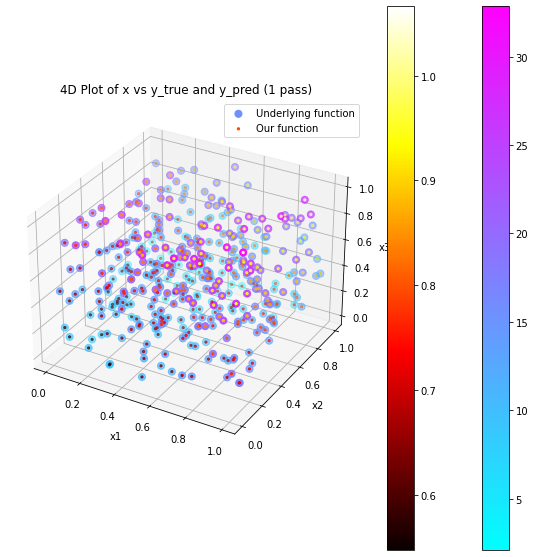

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y_true, cmap='cool', label='Underlying function', s=50)
fig.colorbar(sc)
sc = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y_pred.detach().numpy(), cmap='hot', label='Our function', marker='.')
fig.colorbar(sc)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.set_title('4D Plot of x vs y_true and y_pred (1 pass)')

plt.legend()
plt.show()